**Author Note**:

I wrote this notebook while learning DSPy. Use it to learn yourself and feel free to suggest improvements.

This notebook is the blank version. Feel free to explore other ways to reframe the problem, or switch to the solutions/guided versions on my github.

Estimated time: ~1h

Estimated API cost (using 4.1 nano) :

* < $0.1 without optimization runs

* < $1.0 with optimization runs

Author: Rayane Hachemi ([github](https://github.com/rayanehmi))

# DSPy Guilded Rose Kata

## Problem Introduction

The Guilded Rose kata is a refactoring exercise for developpers. Learn more about the problem on this GitHub repository: https://github.com/emilybache/GildedRose-Refactoring-Kata.



### Guilded Rose Item Update Code

The goal of the kata is to refactor the following code into a cleaner version, and add a new functionality :

```python
class GildedRose(object):

    def __init__(self, items):
        self.items = items

    def update_quality(self):
        for item in self.items:
            if item.name != "Aged Brie" and item.name != "Backstage passes to a TAFKAL80ETC concert":
                if item.quality > 0:
                    if item.name != "Sulfuras, Hand of Ragnaros":
                        item.quality = item.quality - 1
            else:
                if item.quality < 50:
                    item.quality = item.quality + 1
                    if item.name == "Backstage passes to a TAFKAL80ETC concert":
                        if item.sell_in < 11:
                            if item.quality < 50:
                                item.quality = item.quality + 1
                        if item.sell_in < 6:
                            if item.quality < 50:
                                item.quality = item.quality + 1
            if item.name != "Sulfuras, Hand of Ragnaros":
                item.sell_in = item.sell_in - 1
            if item.sell_in < 0:
                if item.name != "Aged Brie":
                    if item.name != "Backstage passes to a TAFKAL80ETC concert":
                        if item.quality > 0:
                            if item.name != "Sulfuras, Hand of Ragnaros":
                                item.quality = item.quality - 1
                    else:
                        item.quality = item.quality - item.quality
                else:
                    if item.quality < 50:
                        item.quality = item.quality + 1


class Item:
    def __init__(self, name, sell_in, quality):
        self.name = name
        self.sell_in = sell_in
        self.quality = quality

    def __repr__(self):
        return "%s, %s, %s" % (self.name, self.sell_in, self.quality)
```

Here is the set of rules in natural language:

---

### Gilded Rose Requirements Specification

Hi and welcome to team Gilded Rose. As you know, we are a small inn with a prime location in a prominent city ran by a friendly innkeeper named Allison. We also buy and sell only the finest goods. Unfortunately, our goods are constantly degrading in `Quality` as they approach their sell by date.

We have a system in place that updates our inventory for us. It was developed by a no-nonsense type named Leeroy, who has moved on to new adventures. Your task is to add the new feature to our system so that we can begin selling a new category of items. First an introduction to our system:

- All `items` have a `SellIn` value which denotes the number of days we have to sell the `items`
- All `items` have a `Quality` value which denotes how valuable the item is
- At the end of each day our system lowers both values for every item

Pretty simple, right? Well this is where it gets interesting:

- Once the sell by date has passed, `Quality` degrades twice as fast
- The `Quality` of an item is never negative
- __"Aged Brie"__ actually increases in `Quality` the older it gets
- The `Quality` of an item is never more than `50`
- __"Sulfuras"__, being a legendary item, never has to be sold or decreases in `Quality`
- __"Backstage passes"__, like aged brie, increases in `Quality` as its `SellIn` value approaches;
	- `Quality` increases by `2` when there are `10` days or less and by `3` when there are `5` days or less but
	- `Quality` drops to `0` after the concert

We have recently signed a supplier of conjured items. This requires an update to our system:

- __"Conjured"__ items degrade in `Quality` twice as fast as normal items

Feel free to make any changes to the `UpdateQuality` method and add any new code as long as everything still works correctly. However, do not alter the `Item` class or `Items` property as those belong to the goblin in the corner who will insta-rage and one-shot you as he doesn't believe in shared code ownership (you can make the `UpdateQuality` method and `Items` property static if you like, we'll cover for you).

Just for clarification, an item can never have its `Quality` increase above `50`, however __"Sulfuras"__ is a legendary item and as such its `Quality` is `80` and it never alters.

---

## What is DSPy ?

"DSPy is a declarative framework for building modular AI software. It allows you to **iterate fast on structured code**, rather than brittle strings, and offers algorithms that **compile AI programs into effective prompts and weights** for your language models, whether you're building simple classifiers, sophisticated RAG pipelines, or Agent loops.

Instead of wrangling prompts or training jobs, DSPy (Declarative Self-improving Python) enables you to **build AI software from natural-language modules** and to generically compose them with different models, inference strategies, or learning algorithms. This makes AI software more reliable, maintainable, and portable across models and strategies."

Read more: https://dspy.ai/.

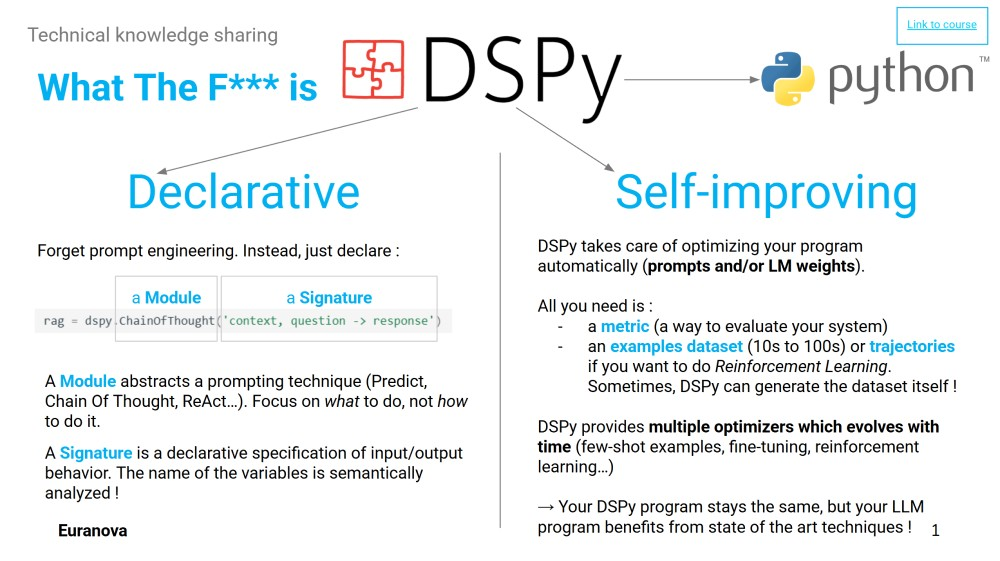

## What's the plan ?

We want to delegate the update function as a LM pass using DSPy.

You can choose to either update items one by one and loop over the list of items, or provide a whole list of items directly.

Similarly, you can decide where to give your LM module agency: for example, by providing it an 'update item tool'.

---

This is the unguided version of the notebook. Feel free to explore the DSPy documentation and learn by yourself. You can always check my solution on my GitHub if you are blocked. Have fun !